In [1]:
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
with open('four_gpu_cifar10.json', 'r') as f:
    four_gpu = json.load(f)

In [4]:
four_gpu

[{'name': 'block1_conv1',
  'layer': 1,
  'run_time': 524.5239779949188,
  'rank': 0},
 {'name': 'block1_conv2',
  'layer': 2,
  'run_time': 889.1378283500671,
  'rank': 1},
 {'name': 'block2_conv1',
  'layer': 4,
  'run_time': 429.6344985961914,
  'rank': 2},
 {'name': 'block2_conv2',
  'layer': 5,
  'run_time': 527.7076570987701,
  'rank': 3},
 {'name': 'block3_conv1',
  'layer': 7,
  'run_time': 284.9867813587189,
  'rank': 0},
 {'name': 'block3_conv2',
  'layer': 8,
  'run_time': 294.20421981811523,
  'rank': 1},
 {'name': 'block3_conv3',
  'layer': 9,
  'run_time': 341.2472097873688,
  'rank': 2},
 {'name': 'block4_conv1',
  'layer': 11,
  'run_time': 244.5338954925537,
  'rank': 3},
 {'name': 'block4_conv2',
  'layer': 12,
  'run_time': 245.3155107498169,
  'rank': 0},
 {'name': 'block4_conv3',
  'layer': 13,
  'run_time': 204.89119458198547,
  'rank': 1},
 {'name': 'block5_conv1',
  'layer': 15,
  'run_time': 229.66471695899963,
  'rank': 2},
 {'name': 'block5_conv2',
  'layer':

In [5]:
gpu_totals = {}

for layer in four_gpu[:-1:]:
    if layer['rank'] not in gpu_totals:
        gpu_totals[layer['rank']] = layer['run_time']
    else:
        gpu_totals[layer['rank']] += layer['run_time']

In [6]:
gpu_totals

{0: 1237.9525640010834,
 1: 1388.2332427501678,
 2: 1000.5464253425598,
 3: 1012.6640491485596}

In [7]:
job_count = {}

for layer in four_gpu[:-1:]:
    if layer['rank'] not in job_count:
        job_count[layer['rank']] = 1
    else:
        job_count[layer['rank']] += 1

In [8]:
job_count

{0: 4, 1: 3, 2: 3, 3: 3}

In [9]:
gpu_0 = [layer['run_time'] for layer in four_gpu[:-1:] if layer['rank'] == 0]
print([layer['layer'] for layer in four_gpu[:-1:] if layer['rank'] == 0])
print(np.cumsum(gpu_0))
gpu_1 = [layer['run_time'] for layer in four_gpu[:-1:] if layer['rank'] == 1]
print([layer['layer'] for layer in four_gpu[:-1:] if layer['rank'] == 1])
print(np.cumsum(gpu_1))
gpu_2 = [layer['run_time'] for layer in four_gpu[:-1:] if layer['rank'] == 2]
print([layer['layer'] for layer in four_gpu[:-1:] if layer['rank'] == 2])
print(np.cumsum(gpu_2))
gpu_3 = [layer['run_time'] for layer in four_gpu[:-1:] if layer['rank'] == 3]
print([layer['layer'] for layer in four_gpu[:-1:] if layer['rank'] == 3])
print(np.cumsum(gpu_3))

[1, 7, 12, 17]
[ 524.52397799  809.51075935 1054.8262701  1237.952564  ]
[2, 8, 13]
[ 889.13782835 1183.34204817 1388.23324275]
[4, 9, 15]
[ 429.6344986   770.88170838 1000.54642534]
[5, 11, 16]
[ 527.7076571   772.24155259 1012.66404915]


### Alt Schedules

#### Next Available

##### GPU 0

1, 7, 12

##### GPU 1

2, 8

##### GPU 2

4, 9, 15, 17

##### GPU 3

5, 11, 16, 15

#### Opt change of last task

##### GPU 0

1, 7, 12

##### GPU 1

2, 8

##### GPU 2

4, 9, 15, 15

##### GPU 3

5, 11, 16, 17

In [10]:
# add zeros for stacked bar
# chart
gpu_1.append(0)
gpu_2.append(0)
gpu_3.append(0)

In [11]:
task_0 = [gpu_0[0], gpu_1[0], gpu_2[0], gpu_3[0]]
task_1 = [gpu_0[1], gpu_1[1], gpu_2[1], gpu_3[1]]
task_2 = [gpu_0[2], gpu_1[2], gpu_2[2], gpu_3[2]]
task_3 = [gpu_0[3], gpu_1[3], gpu_2[3], gpu_3[3]]

In [12]:
r = [0, 1, 2, 3]
names = ['gpu_0', 'gpu_1', 'gpu_2', 'gpu_3']

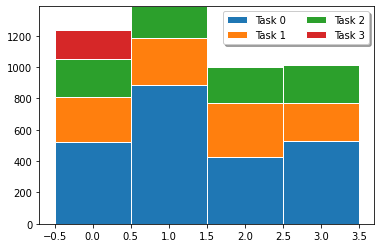

In [13]:
one_two = np.add(task_0, task_1).tolist()
all_three = np.add(one_two, task_2).tolist()
plt.bar(r, task_0, edgecolor='white', width=1)
plt.bar(r, task_1, bottom=task_0, edgecolor='white', width=1)
plt.bar(r, task_2, bottom=np.add(task_0, task_1).tolist(), edgecolor='white', width=1)
plt.bar(r, task_3, bottom=all_three, edgecolor='white', width=1)
plt.legend(['Task 0', 'Task 1', 'Task 2', 'Task 3'], loc='upper right', ncol=2, fancybox=True, shadow=True)

In [14]:
with open('three_gpu_cifar10.json', 'r') as f:
    three_gpu_es = json.load(f)

In [15]:
three_gpu_totals = {}

for layer in three_gpu_es[0:-1:]:
    print(layer)
    if layer['rank'] not in three_gpu_totals:
        three_gpu_totals[layer['rank']] = layer['run_time']
    else:
        three_gpu_totals[layer['rank']] += layer['run_time']

{'name': 'block1_conv1', 'layer': 1, 'run_time': 622.1223328113556, 'rank': 0}
{'name': 'block1_conv2', 'layer': 2, 'run_time': 1085.2417392730713, 'rank': 1}
{'name': 'block2_conv1', 'layer': 4, 'run_time': 514.2735166549683, 'rank': 2}
{'name': 'block2_conv2', 'layer': 5, 'run_time': 634.7863533496857, 'rank': 0}
{'name': 'block3_conv1', 'layer': 7, 'run_time': 344.7665150165558, 'rank': 1}
{'name': 'block3_conv2', 'layer': 8, 'run_time': 398.2465965747833, 'rank': 2}
{'name': 'block3_conv3', 'layer': 9, 'run_time': 396.8348140716553, 'rank': 0}
{'name': 'block4_conv1', 'layer': 11, 'run_time': 262.0815439224243, 'rank': 1}
{'name': 'block4_conv2', 'layer': 12, 'run_time': 302.79961800575256, 'rank': 2}
{'name': 'block4_conv3', 'layer': 13, 'run_time': 290.1068506240845, 'rank': 0}
{'name': 'block5_conv1', 'layer': 15, 'run_time': 238.54691457748413, 'rank': 1}
{'name': 'block5_conv2', 'layer': 16, 'run_time': 268.791960477829, 'rank': 2}
{'name': 'block5_conv3', 'layer': 17, 'run_ti

In [16]:
three_gpu_totals

{0: 2169.842597961426, 1: 1930.6367127895355, 2: 1484.1116917133331}

In [17]:
gpu_0 = [layer['run_time'] for layer in three_gpu_es[:-1:] if layer['rank'] == 0]
print([layer['layer'] for layer in three_gpu_es[:-1:] if layer['rank'] == 0])
print(np.cumsum(gpu_0))
gpu_1 = [layer['run_time'] for layer in three_gpu_es[:-1:] if layer['rank'] == 1]
print([layer['layer'] for layer in three_gpu_es[:-1:] if layer['rank'] == 1])
print(np.cumsum(gpu_1))
gpu_2 = [layer['run_time'] for layer in three_gpu_es[:-1:] if layer['rank'] == 2]
print([layer['layer'] for layer in three_gpu_es[:-1:] if layer['rank'] == 1])
print(np.cumsum(gpu_2))

[1, 5, 9, 13, 17]
[ 622.12233281 1256.90868616 1653.74350023 1943.85035086 2169.84259796]
[2, 7, 11, 15]
[1085.24173927 1430.00825429 1692.08979821 1930.63671279]
[2, 7, 11, 15]
[ 514.27351665  912.52011323 1215.31973124 1484.11169171]


In [18]:
gpu_1.append(0)
gpu_2.append(0)

In [19]:
task_0 = [gpu_0[0], gpu_1[0], gpu_2[0]]
task_1 = [gpu_0[1], gpu_1[1], gpu_2[1]]
task_2 = [gpu_0[2], gpu_1[2], gpu_2[2]]
task_3 = [gpu_0[3], gpu_1[3], gpu_2[3]]
task_4 = [gpu_0[4], gpu_1[4], gpu_2[4]]

In [20]:
r = [0, 1, 2]
names = ['gpu_0', 'gpu_1', 'gpu_2']

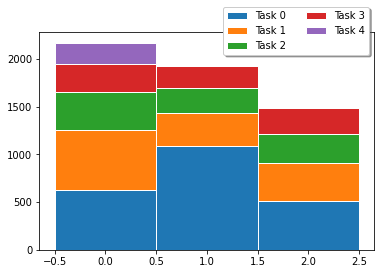

In [21]:
one_two = np.add(task_0, task_1).tolist()
all_three = np.add(one_two, task_2).tolist()
all_four = np.add(all_three, task_3).tolist()
plt.bar(r, task_0, edgecolor='white', width=1)
plt.bar(r, task_1, bottom=task_0, edgecolor='white', width=1)
plt.bar(r, task_2, bottom=np.add(task_0, task_1).tolist(), edgecolor='white', width=1)
plt.bar(r, task_3, bottom=all_three, edgecolor='white', width=1)
plt.bar(r, task_4, bottom=all_four, edgecolor='white', width=1)
plt.legend(['Task 0', 'Task 1', 'Task 2', 'Task 3', 'Task 4'], loc='upper right', bbox_to_anchor=(1, 1.14), ncol=2, fancybox=True, shadow=True)
